In [13]:
#Import numerical libraries
import pandas as pd
import numpy as np


#Import graphical plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Linear Regression Machine Learning Libraries
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [14]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\car-mpg.csv")
data.head()

mpg  cyl   disp   hp    wt   acc  yr  origin  car_type  \
0  18.0    8  307.0  130  3504  12.0  70       1         0   
1  15.0    8  350.0  165  3693  11.5  70       1         0   
2  18.0    8  318.0  150  3436  11.0  70       1         0   
3  16.0    8  304.0  150  3433  12.0  70       1         0   
4  17.0    8  302.0  140  3449  10.5  70       1         0   

                    car_name  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino

In [15]:
data = data.drop(['car_name'], axis = 1)
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
data = pd.get_dummies(data,columns = ['origin'])
data = data.replace('?', np.nan)

In [16]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [17]:
data = data.apply(lambda x: x.fillna(x.median()), axis = 0)

In [18]:
X = data.drop(['mpg'], axis = 1) # independent variable
y = data[['mpg']] #dependent variable

In [19]:
#Scaling the data

X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns) #converting scaled data into dataframe

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns = y.columns) #ideally train, test data should be in columns

In [20]:
#Split into train, test set

X_train, X_test, y_train,y_test = train_test_split(X_s, y_s, test_size = 0.30, random_state = 1)
X_train.shape

(278, 10)

In [21]:
#Fit simple linear model and find coefficients
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))

The coefficient for cyl is 0.3210223856916108
The coefficient for disp is 0.3248343091848394
The coefficient for hp is -0.2291695005943759
The coefficient for wt is -0.7112101905072299
The coefficient for acc is 0.014713682764191435
The coefficient for yr is 0.3755811949510741
The coefficient for car_type is 0.38147694842331
The coefficient for origin_america is -0.0747224754758417
The coefficient for origin_asia is 0.04451525203567813
The coefficient for origin_europe is 0.04834854953945371
The intercept is 0.019284116103639715


In [22]:
 #alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

ridge_model = Ridge(alpha = 0.3)
ridge_model.fit(X_train, y_train)

print('Ridge model coef: {}'.format(ridge_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here   

Ridge model coef: [ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
  0.37725608 -0.07423624  0.04441039  0.04784031]


In [23]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

print('Lasso model coef: {}'.format(lasso_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here   

Lasso model coef: [-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


In [24]:
#Model score - r^2 or coeff of determinant
#r^2 = 1-(RSS/TSS) = Regression error/TSS 


#Simple Linear Model
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

print('*************************')
#Ridge
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

print('*************************')
#Lasso
print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.8343770256960538
0.8513421387780067
*************************
0.8343617931312617
0.8518882171608501
*************************
0.7938010766228453
0.8375229615977084


In [25]:
data_train_test = pd.concat([X_train, y_train], axis =1)
data_train_test.head()

cyl      disp        hp        wt       acc        yr  car_type  \
350 -0.856321 -0.849116 -1.081977 -0.893172 -0.242570  1.351199  0.941412   
59  -0.856321 -0.925936 -1.317736 -0.847061  2.879909 -1.085858  0.941412   
120 -0.856321 -0.695475  0.201600 -0.121101 -0.024722 -0.815074  0.941412   
12   1.498191  1.983643  1.197027  0.934732 -2.203196 -1.627426 -1.062235   
349 -0.856321 -0.983552 -0.951000 -1.165111  0.156817  1.351199  0.941412   

     origin_america  origin_asia  origin_europe       mpg  
350        0.773559    -0.497643      -0.461968  1.432898  
59        -1.292726    -0.497643       2.164651 -0.065919  
120       -1.292726    -0.497643       2.164651 -0.578335  
12         0.773559    -0.497643      -0.461968 -1.090751  
349       -1.292726     2.009471      -0.461968  1.356035

In [26]:
import statsmodels.formula.api as smf
ols1 = smf.ols(formula = 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data = data_train_test).fit()
ols1.params

Intercept         0.019284
cyl               0.321022
disp              0.324834
hp               -0.229170
wt               -0.711210
acc               0.014714
yr                0.375581
car_type          0.381477
origin_america   -0.074722
origin_europe     0.048349
origin_asia       0.044515
dtype: float64

In [27]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           3.12e-99
Time:                        17:55:42   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0193      0.025      0.

In [28]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse  = np.mean((regression_model.predict(X_test)-y_test)**2)

# root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 0.3776693425408783


<Axes: xlabel='acc', ylabel='mpg'>

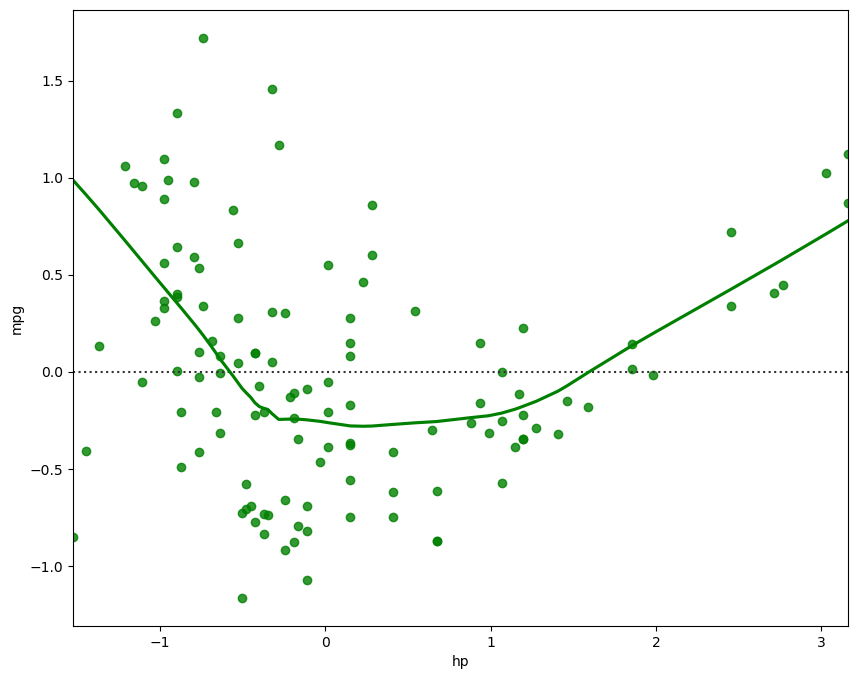

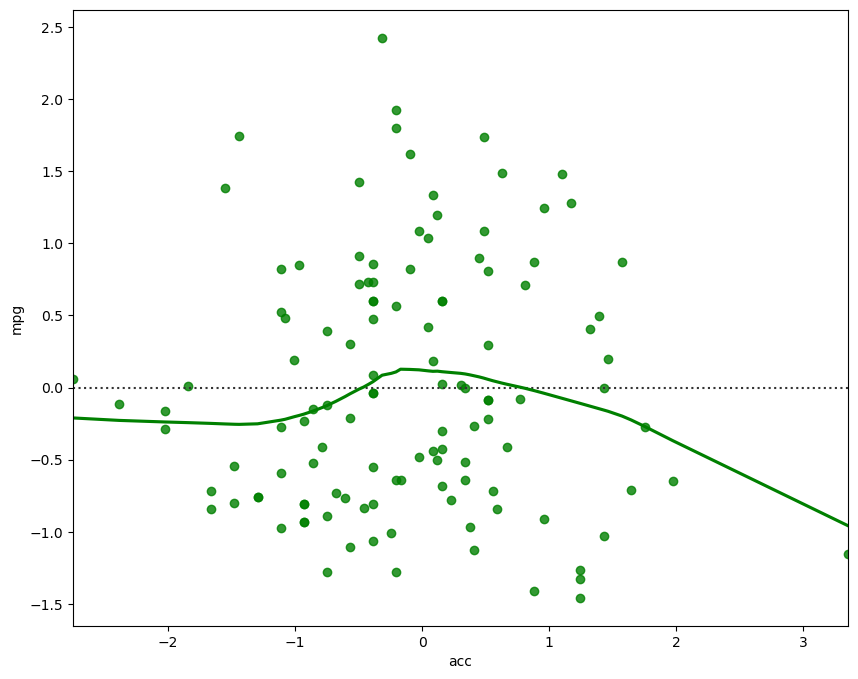

In [29]:
# Is OLS a good model ? Lets check the residuals for some of these predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['acc'], y= y_test['mpg'], color='green', lowess=True )

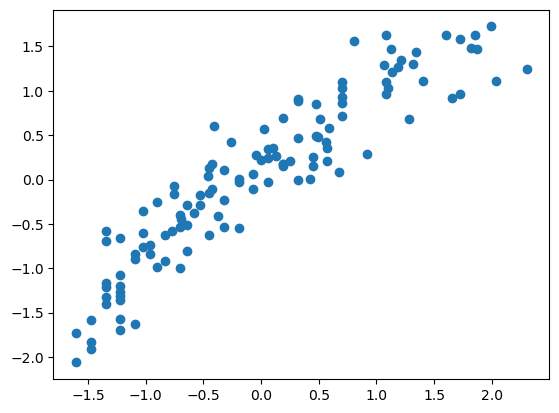

In [30]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500
plt.scatter(y_test['mpg'], y_pred)